In [1]:
from pylab import *
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [2]:
data = Table.read('data_PAH1&2_removed.tbl',format='ipac')
PAH1 = Table.read('PAH_1.tbl',format='ipac')
PAH2 = Table.read('PAH_2.tbl',format='ipac')
print(data.colnames)
print (len(data))

['designation', 'tmass_designation', 'tmass_cntr', 'l', 'b', 'dl', 'db', 'ra', 'dec', 'dra', 'ddec', 'csf', 'mag_J', 'dJ_m', 'mag_H', 'dH_m', 'mag_Ks', 'dKs_m', 'mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8', 'd5_8m', 'mag8_0', 'd8_0m']
607840


In [3]:
band4_5 = data['mag4_5']
band5_8 = data['mag5_8']
band3_6 = data['mag3_6']
band8_0 = data['mag8_0']

In [4]:
a = band4_5-band8_0
b = band4_5
AGN_index = []
for i in range(0,len(data)):
    if band4_5[i] > 13.5:
        if a[i] >0.5:
            if (b[i]>13.5+(a[i]-2.3)/0.4):
                if data['d3_6m'][i]<0.2:
                        if data['d4_5m'][i]<0.2:
                            if data['d5_8m'][i]<0.2:
                                if data['d8_0m'][i]<0.2:
                                    if band4_5[i] > 14.5:
                                        AGN_index.append(i)
                                    if (b[i]> 14+(a[i]-0.5)):
                                        AGN_index.append(i)
                                    if (b[i] > 14.5-(a[i]-1.2)/0.3):
                                        AGN_index.append(i)

In [5]:
AGN = data[AGN_index]
AGN.write('AGN.tbl',format='ipac')

Text(0.5,1,'AGN star')

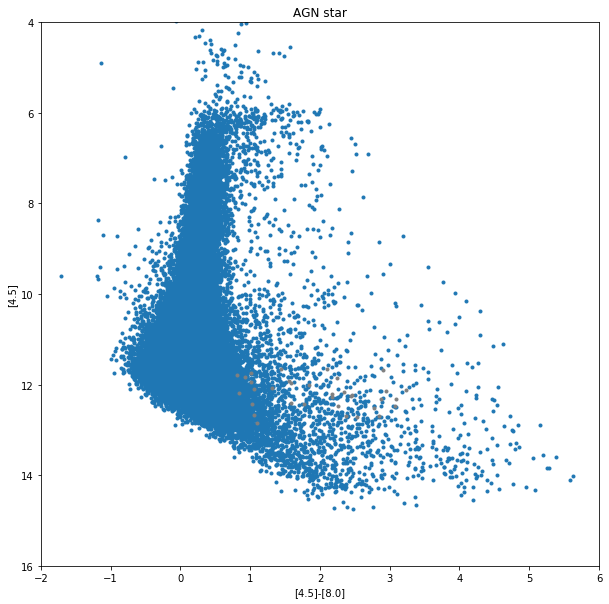

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(a,b,marker = '.')
plt.scatter(a[AGN_index],b[AGN_index], color = 'red')

plt.scatter(PAH1['mag4_5']-PAH1['mag8_0'],PAH1['mag4_5'],color='grey',marker='.')
plt.scatter(PAH2['mag4_5']-PAH2['mag8_0'],PAH2['mag4_5'],color='grey',marker='.')
plt.xlim(-2, 6)
plt.ylim(16, 4)
plt.xlabel('[4.5]-[8.0]')
plt.ylabel('[4.5]')
plt.title('AGN star')

In [8]:
data.remove_rows(AGN_index)
data.write('data_PAH&AGN_removed.tbl',format='ipac')